# Demonstration of Signal Processing on Sound Waves

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt

Load a piece of sound waves from a file.

In [2]:
(rate, data) = sp.io.wavfile.read('WeightOfTheWorld2.wav')

In [7]:
#mono = np.sum(data[0:44100,:],1)
mono = data[0:min(len(data),44100)] # Two seconds woth of data
rate, np.shape(mono)

(22050, (44100,))

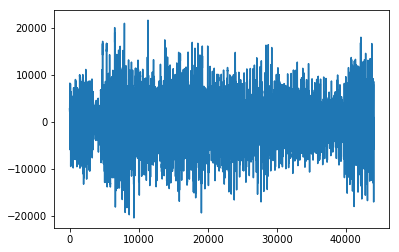

In [8]:
plt.plot(mono)

Unfortunately we don't have STFT (Short-time Fourier Transform) by default in SciPy 0.18.  Apparently a newer version, 0.19, has it, but Anaconda comes with the older one.  For now, Continuous Wavelet Transform is the only option.

In [9]:
scalo = sp.signal.cwt(mono, sp.signal.ricker, np.arange(1, 1001))

In [10]:
np.shape(scalo)

(1000, 44100)

(0, 44100)

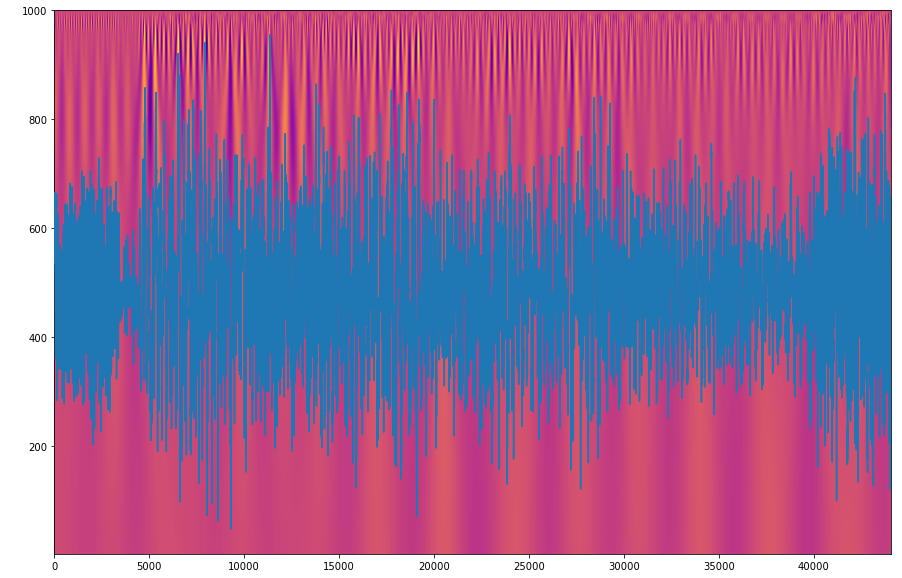

In [11]:
#logs = np.log(abs(scalo))
logs = scalo

fig, axs = plt.subplots(1,1,figsize=(15,10))

axs.imshow(logs, extent=[0, np.shape(scalo)[1], 1, np.shape(logs)[0]], cmap='plasma', aspect='auto',
        vmax=abs(logs).max(), vmin=-abs(logs).max())

# Begin overlapped plot
fig.canvas.draw()

box = axs._position.bounds
tmpax = fig.add_axes(box)
tmpax.set_axis_off()

tmpax.plot(mono)
tmpax.set_xlim(0, len(mono))


Wavelet Transform isn't that interesting in that it doesn't show frequency information which is vital in sound wave files.